<a href="https://colab.research.google.com/github/nityawastaken/Synapse_LP/blob/week-2/nitya_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

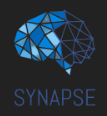

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

https://www.geeksforgeeks.org/ml-classification-vs-regression/
(Short and Sweet)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
# !pip install shap -q  #Will be used later on

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Regression

For regression we will use the car sales dataset - https://drive.google.com/file/d/1dtwer8INIz05mULkV5yk8-Fzk2r3K1Of/view?usp=sharing

#### Basic EDA

Import dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Synapse LP/week 2/Car_details.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


##### Do .head, .info and .describe in the subsequent cells

In [ ]:
# df.dropna(inplace=True)
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
# Fill NaN values in the dataset
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.405389
std,4.044249,8.062534e+05,5.655055e+04,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


##### Plot a bar chart for the year, fuel and transmission columns

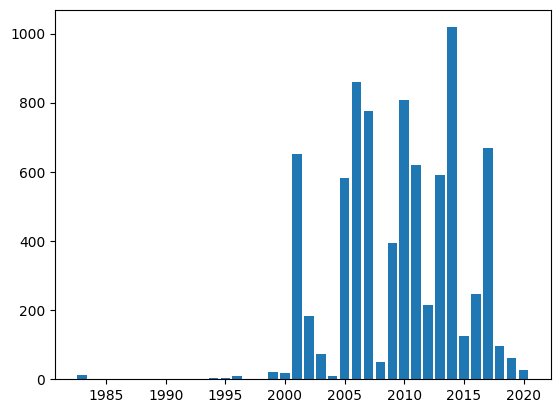

In [ ]:
plt.bar(df['year'].unique(),height=df.value_counts('year'))
# plt.plot(df['year'])
plt.show()

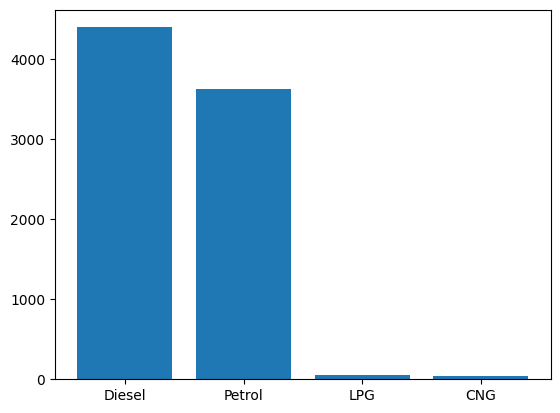

In [ ]:
plt.bar(df['fuel'].unique(),height=df.value_counts('fuel'))
# plt.plot(df['fuel'])
plt.show()

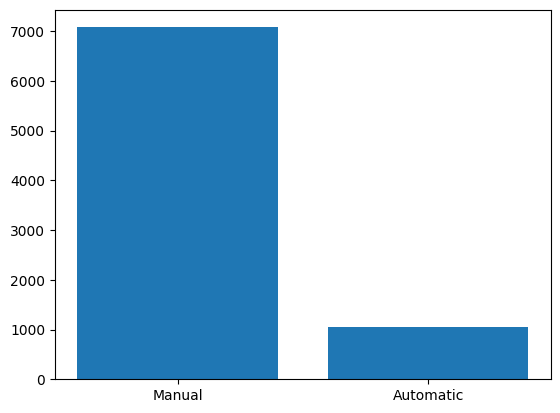

In [ ]:
plt.bar(df['transmission'].unique(),df.value_counts('transmission'))
plt.show()

##### Plot a pie chart for the owner and seats column

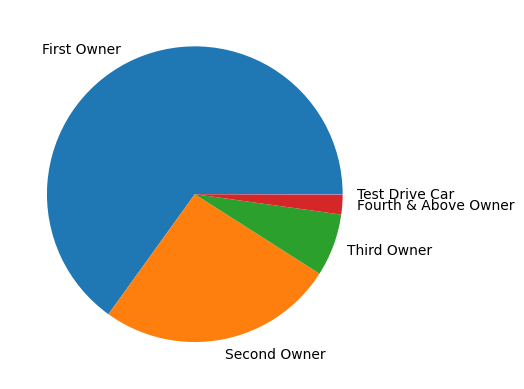

In [ ]:
owner_data=df['owner'].unique()
# print(owner_data)
owner_percentage=(df['owner'].value_counts()/df.shape[0])*100
# print(owner_percentage)
plt.pie(owner_percentage,labels=owner_data)
plt.show()

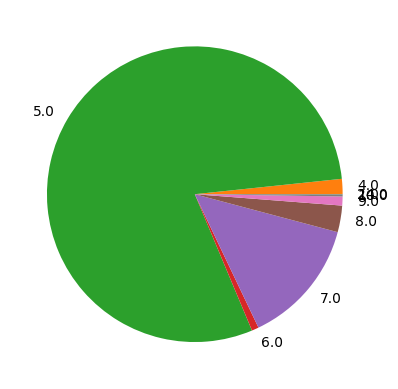

In [ ]:

# df.info()
# plt.figure(figsize=(6,6))
# plt.pie(df['seats'].value_counts(),labels=df['seats'].unique()) #how to reduce textsize
# plt.show()

#doubt: why isnt the above code working

seats=df.groupby('seats').size()
plt.pie(seats.values,labels=seats.index)
plt.show()

##### Since the engine column is of type object you'll need to convert it to float and round it to the nearest 10 place as it would be easier to count and plot


In [ ]:
# code here
import math
# df['engine'] = df['engine'].str.replace(r'[^0-9.]', '',regex=True).astype(float)


def round_up_to_nearest_10(value):
    if pd.isna(value):
        return None
    value=value[:-2].strip()

    return math.ceil(float(value) / 10) * 10

df['engine'] = df['engine'].apply(round_up_to_nearest_10)

engine_counts = df['engine'].value_counts()
engines=df['engine'].unique()
# code ends

##### Make a KDE plot to represent the engine column

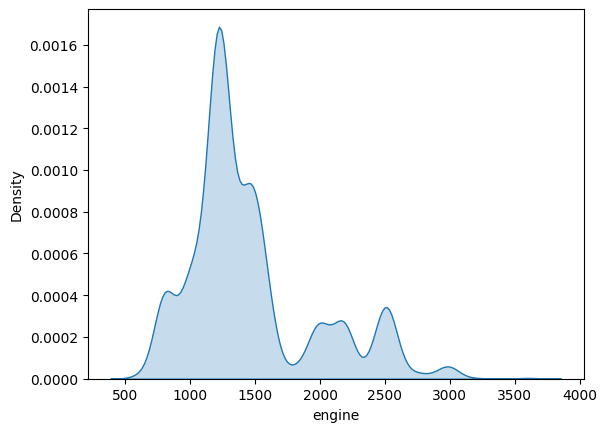

In [ ]:
sns.kdeplot(df['engine'],fill=True)
plt.show()

Plot the graph

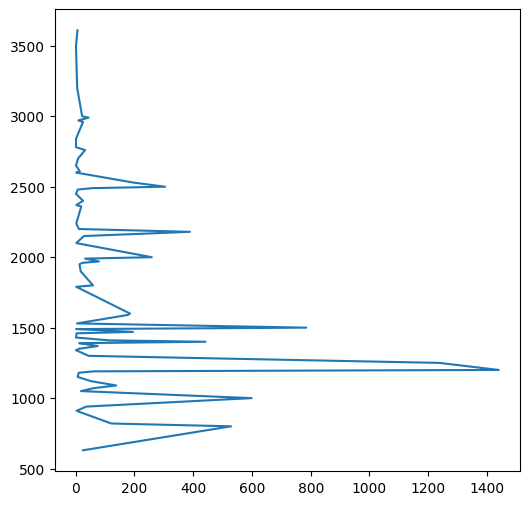

In [ ]:
engine_grp=df.groupby('engine').size()
plt.figure(figsize=(6,6))
# plt.pie(engine_grp.values,labels=engine_grp.index)               #doubts
# plt.bar(engine_grp.values,engine_grp.index,width=1.5)
plt.plot(engine_grp.values,engine_grp.index)
plt.show()
# plt.bar(engines,engine_counts,width=1.5)

##### Also make a countplot for the Engine column
hint: sns.countplot

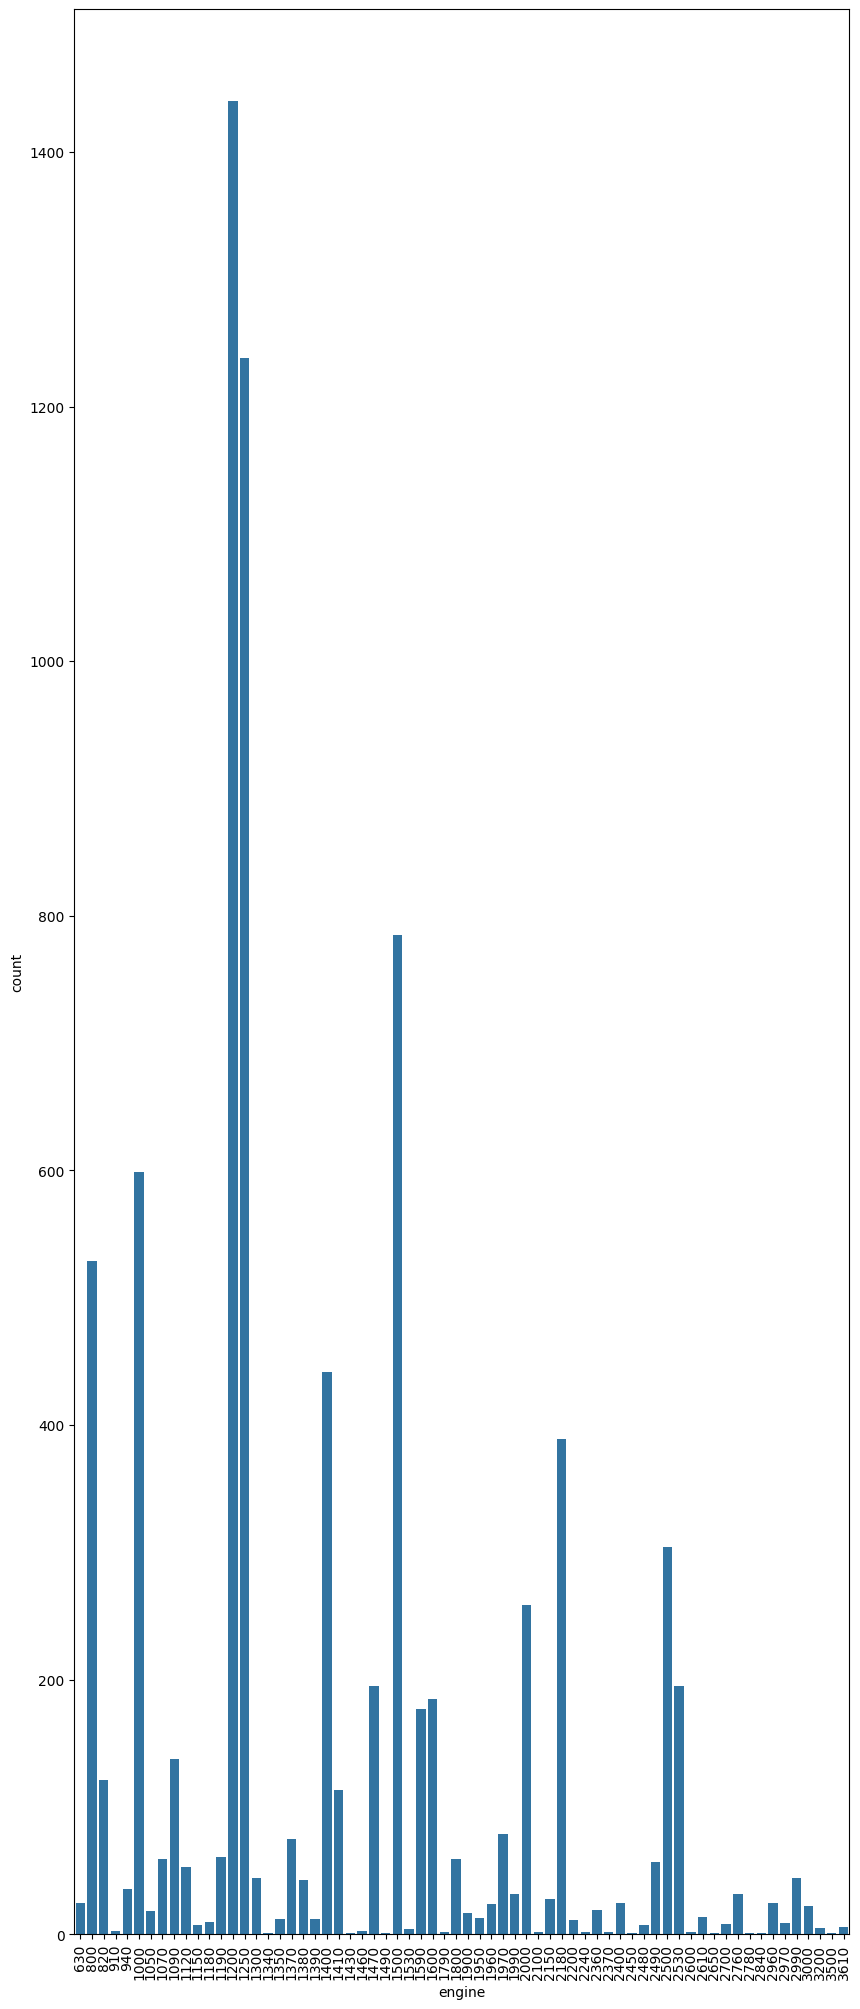

In [ ]:
#plot here
# df['engine2'] = df['engine'].astype('category')
plt.figure(figsize=(10,25))
# sns.countplot(df['engine2'])
# plt.xlabel('engine capacity (cc)')
# plt.show()
# sns.countplot(df['engine'].astype(str))
plt.xticks(rotation=90)
sns.countplot(x=df['engine'])
plt.show()

##### As you can see in the Name column the entire name of the car is given, it will be very difficut to perfrom EDA and feed in this column into our Regression model so we will just extract the car manufacturer's name and create a new column Brand

In [ ]:
# code here
def extract_manu(value):
  brand=value.split()[0]
  return brand

df['brand']=df['name'].apply(extract_manu)
df.drop('name',axis=1,inplace=True)
df.head(7)
# code ends

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1250,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1500,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1500,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1400,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1300,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1200,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1070,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti


##### Plot a bar graph for the new column brand

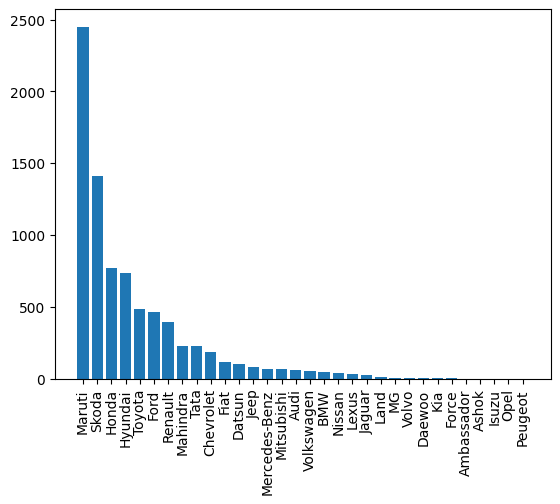

In [ ]:
#plot here
plt.bar(df['brand'].unique(),df.value_counts('brand'))
plt.xticks(rotation=90)
plt.show()

#### Perform a simiar process as Engine column for the Mileage column, extract the mileage number convert it to float and round it to the nearest 1's place

In [ ]:
# code here
def round_up_to_nearest_1(value):
    if pd.isna(value):
        return None
    return round(value)
df['mileage'] = df['mileage'].replace(r'[^0-9.]', '',regex=True).astype(float)

df['mileage'] = df['mileage'].apply(round_up_to_nearest_1)
# df['mileage']
# mileage_counts = df['mileage'].value_counts()
# mileages=df['mileage'].unique()

# code ends

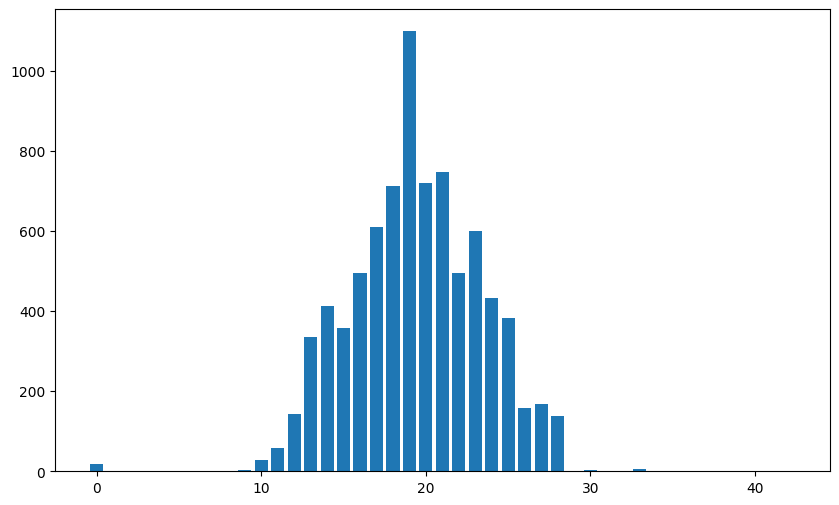

In [ ]:
#plot the count of each mileage value

sales_by_mileage = df.groupby('mileage').size()
plt.figure(figsize=(10,6))
plt.bar(sales_by_mileage.index, sales_by_mileage.values)
plt.show()
# code here

#### If you want to do more analysis and make some graphs you are more than welcome :)

## What do you infer from the above analysis

### Answer Here



* car sales rised in the year 2000 and decresed towards 2020
* diesel and petrol sold more than lpg and cng

*  manual cars were sold more than automatic
*   most cars were bought first hand


*   most ppl bought 5 seater cars
*   most car engines were in the range of 100-1500 cc


*   cars of the brand maruti were sold maximum
*  most cars gave a mileage of 17-23 kmpl

### Now let's prep our data to perform Regression to predict the Selling Price

##### As you can see the column max_power is of type object, we need to extract the max_power similar to Engine and Mileage columns

Be careful of NaN values in this part of the code, perform df.info() to look how many Nan value are present, you might face diffculties when you are trying to convert object to float in Nan values are present

In [ ]:
# code here
# df['max_power'].dropna(inplace=True)
# df['max_power']=df['max_power'].astype(str)
# df['max_power'] = df['max_power'].str.replace(r'^[0-9.]', ' ') #ye kya kiya hai lmaooooo
# for i in df['max_power']:
#   i=i.strip()
#   i=float(i)
# df['max_power']=df['max_power'].astype('category')
# def tofloat(value):
#   value=value[:-4].strip()
#   # print(value)
#   return value
# df['max_power']=df['max_power'].apply(tofloat).astype(float)
# df['max_power']=pd.to_numeric(df['max_power'],errors='coerce')
# df['max_power']
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_power']

,max_power
0,74.00
1,103.52
2,78.00
3,90.00
4,88.20
...,...
8123,82.85
8124,110.00
8125,73.90
8126,70.00


In [ ]:
# code ends

##### The year column contains the year the car was manufactured, but this data won't be directly useful to us
##### Use the current year to calculate the age of the car

In [ ]:
# code here
from datetime import datetime
current_datetime = datetime.now()
current_year = current_datetime.year
df['age']=current_year-df['year']
df
# drop the columns year and name
df.drop(labels=['year','torque'],axis=1,inplace=True)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23,1250,74.00,5.0,Maruti,10
1,370000,120000,Diesel,Individual,Manual,Second Owner,21,1500,103.52,5.0,Skoda,10
2,158000,140000,Petrol,Individual,Manual,Third Owner,18,1500,78.00,5.0,Honda,18
3,225000,127000,Diesel,Individual,Manual,First Owner,23,1400,90.00,5.0,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,First Owner,16,1300,88.20,5.0,Maruti,17
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18,1200,82.85,5.0,Hyundai,11
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,17,1500,110.00,5.0,Hyundai,17
8125,382000,120000,Diesel,Individual,Manual,First Owner,19,1250,73.90,5.0,Maruti,15
8126,290000,25000,Diesel,Individual,Manual,First Owner,24,1400,70.00,5.0,Tata,11


##### A few of the columns are still of dtype object, now we will be using Laber Encoder to encode these columns

##### Import LaberEncoder from sklearn

In [ ]:
# import here
from sklearn.preprocessing import LabelEncoder #why cant we do import as lbenc
# now label encode the colums = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']
# code here
label_encoder = LabelEncoder()
for column in ['fuel', 'seller_type', 'transmission', 'owner', 'brand']:
  df[column]=label_encoder.fit_transform(df[column])

# code ends

Do df.head() to see how your dataframe looks like after LabelEncoding

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,450000,145500,1,1,1,0,23,1250,74.00,5.0,20,10
1,370000,120000,1,1,1,2,21,1500,103.52,5.0,27,10
2,158000,140000,3,1,1,4,18,1500,78.00,5.0,10,18
3,225000,127000,1,1,1,0,23,1400,90.00,5.0,11,14
4,130000,120000,3,1,1,0,16,1300,88.20,5.0,20,17


##### The reason behind standardization and normalization will be explained in the later part of the task

##### For now we need to Normalize somem specific coloums
##### Import MinMaxScaler from sklearn and normalize the coloums - ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']

In [ ]:
# import here
from sklearn.preprocessing import MinMaxScaler
# code here
scaler = MinMaxScaler()
df[['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']] = scaler.fit_transform(df[['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'age', 'selling_price']])

#code ends

In [ ]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,0.042126,0.061640,1,1,1,0,0.547619,0.208054,0.1850,0.25,20,0.162162
1,0.034102,0.050837,1,1,1,2,0.500000,0.291946,0.2588,0.25,27,0.162162
2,0.012839,0.059310,3,1,1,4,0.428571,0.291946,0.1950,0.25,10,0.378378
3,0.019559,0.053803,1,1,1,0,0.547619,0.258389,0.2250,0.25,11,0.270270
4,0.010030,0.050837,3,1,1,0,0.380952,0.224832,0.2205,0.25,20,0.351351


In [ ]:

df_new=df.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8127 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  8127 non-null   float64
 1   km_driven      8127 non-null   float64
 2   fuel           8127 non-null   int64  
 3   seller_type    8127 non-null   int64  
 4   transmission   8127 non-null   int64  
 5   owner          8127 non-null   int64  
 6   mileage        8127 non-null   float64
 7   engine         8127 non-null   float64
 8   max_power      8127 non-null   float64
 9   seats          8127 non-null   float64
 10  brand          8127 non-null   int64  
 11  age            8127 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 825.4 KB


As mentioned above, the 'selling_price' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'selling_price') and one which only contains the column 'selling_price'. Name them X and y respectively.

In [ ]:
# Seperate the Dataframe into X and y
X = df.drop(columns=['selling_price'])
Y = df['selling_price']

### Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# import here
from sklearn.model_selection import train_test_split

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)  #doubt: if i dont do print why is only last one shown

(5689, 11)
(2439, 11)
(5689,)
(2439,)


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

### We have preprocessed our DataFrame now we'll perform Regression on this Data

### First lets understand Linear Regression, watch this video carefully it will be helpfull later on :)

https://www.youtube.com/watch?v=7ArmBVF2dCs

### A quick article
https://www.analyticsvidhya.com/blog/2021/08/understanding-linear-regression-with-mathematical-insights/

In [ ]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# perform linear regression
# create an instance of LinearRegression
model=LinearRegression()

In [ ]:
# fit the model on the training data, hint: use the fit method
model.fit(X_train, Y_train)

LinearRegression()

#### The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

#### Use regressor.predict() on X_test and store it in a variable called "y_pred". Print type and size of the y_pred.

#### Size should be (22009,) if everything is correct. Yeh line confirm karna hai

In [ ]:
# make predictions on the test data
Y_pred = model.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

### Visualize the predictions, plot a scatter plot of y_test vs y_pred and also plot the best fit line

In [ ]:
#plot here
plt.scatter(Y_test, Y_pred,c='b')
m, c = np.polyfit(Y_test, Y_pred, 1)
plt.plot(Y_test, m*Y_test + c, color='red', label='Best Fit Line')

plt.show()


# Now let's start the fun part :)

### Have you ever wondered what happens when you call **'regressor.fit(X_train, y_train)'** ?

### To understand what's hapenning in .fit method we will be implementing Linear Regression from scratch.

In [ ]:
class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :
        # initialize the learning rate and iterations provides by the user
        self.learning_rate =learning_rate

        self.iterations =iterations

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n =X.shape

        # what does self.m and self.n represent and why are they calculated?

        # weight initialization
        self.W = np.zeros(self.n)

        self.b = 0# set this equal to 0

        self.X = X # set this equal to X

        self.Y = Y # set this equal to Y


        # gradient descent learning
        for i in range(self.iterations) : # complete the range function

            self.self.update_weights()

        return self

    # Helper function to update weights in gradient descent
    def update_weights(self) :

        Y_pred = self.X.dot(self.W) + self.b # complete this line

        # calculate gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # write the code to update the weights
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db
        return self


    def predict(self,X) :

        return X.dot(self.W) + self.b


In [ ]:
model = LinearRegression( iterations = 10000, learning_rate = 0.0001 )

model.fit(X,Y) # Explain in your own words what the fit function does

#### Answer Here

In [ ]:
y_pred =model.predict(X) # code here

In [ ]:
mse=mean_squared_error(Y-y_pred)# Calculate the mean squared error

In [ ]:
# plot a similar scatter plot as above
plt.scatter(Y, y_pred,c='b')
m, c = np.polyfit(Y, y_pred, 1)
plt.plot(Y, m*Y + c, color='red', label='Best Fit Line')


## Classification

#### In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Synapse LP/week 2/classified_data.txt',index_col=0)
df.head()
df.columns[:5]

If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

#### Basic EDA

##### In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

In [ ]:
df.describe()

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
##### Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
##### Refer seaborn boxplot() documentation

In [ ]:
#plot
target_0_1=df[(df['TARGET CLASS']==0)|(df['TARGET CLASS']==1)]
features = df[df.columns[df.columns != 'TARGET CLASS'] ]
i=0
for feature in features:
    i+=1
    plt.figure(figsize=(4, 2))
    sns.boxplot(x='TARGET CLASS', y=feature, data=target_0_1)
    plt.title(f'Boxplot{i} of {feature} by TARGET CLASS')
    plt.xlabel('TARGET CLASS')
    plt.ylabel(feature)
    plt.show()



In [ ]:
features

##### What conclusion, if any can you draw from these boxplots?
List them down below.

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

##### **import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# your code ends here

##### **Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
##### Hint: scaler.fit() and scaler.transform()

In [ ]:
# your code starts here
scaler.fit(features)
features_scaled=scaler.transform(features)

# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# your code starts here
df_feat=pd.DataFrame(features_scaled,columns=features.columns)
# df_feat['name']=''
# df.insert(0,column='name',value=df_feat['name'])
df_feat
# your code ends here               #doubt

### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
X,y = df_feat,df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=1)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
# Your code ends here

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# Your code starts here.

pred=knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))
# Your code ends here

#### Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here.
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Y_test, pred)
accuracy2 = np.mean(Y_test == pred)

print(f'accuracy using accuracy_score is {accuracy1.round(3)} and using numpy is {accuracy2.round(3)}')
# Your code ends here

##### Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
accuracy_lst = [accuracy1]

for i in range(2,61):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  accuracy_lst.append(accuracy_score(Y_test,pred_i))


# Your code ends here

##### **Plot a graph of K value vs Accuracy**

In [ ]:
# Your code starts here.
plt.plot(range(1,61), accuracy_lst)

# Your code ends here

##### **Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# Your code starts here.
n_acc_best =0.953
n_neigh_best = 15
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

### OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

In [ ]:
import shap

In [ ]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
#Run this code as it is
ex = KernelExplainer(regressor.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

##### Plotting the same information in a different way

In [ ]:
explainer_ebm = shap.Explainer(regressor.predict,sample(X_train, 10))
shap_values_ebm = explainer_ebm(X_train)

In [ ]:
shap.plots.beeswarm(shap_values_ebm)

#### Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

RESEARCH TASK:


A)Logistic Regression

https://ryxcommar.com/2020/06/27/why-do-so-many-practicing-data-scientists-not-understand-logistic-regression/

B) Read the above article and write you understand


What is a logit, probit?

C) Difference between logistic regression and classification

End of Task

©DJS Synapse 2024 - 2025